# Training the Model (Decision Tree)

In [17]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [19]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[3].split(".")[0])
        print(fn)
    return np.array(features), np.array(labels)


tr_features, tr_labels = parse_audio_files('./train_80/*.wav')

print(tr_labels)

tr_features = np.array(tr_features, dtype=pd.Series)
tr_labels = np.array(tr_labels, dtype=pd.Series)

X=tr_features.astype(int)
y=tr_labels.astype(str)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

filename = 'clf_Model_protocol_tree.sav'

pickle.dump(clf, open(filename, 'wb'), protocol=2)

print('Model Saved..')
print('Score:', clf.score(X=tr_features.astype(int), y=tr_labels.astype(str)))

./train_80\OAF_back_angry.wav
./train_80\OAF_back_disgust.wav
./train_80\OAF_back_fear.wav
./train_80\OAF_back_happy.wav
./train_80\OAF_back_neutral.wav
./train_80\OAF_back_ps.wav
./train_80\OAF_back_sad.wav
./train_80\OAF_bar_angry.wav
./train_80\OAF_bar_disgust.wav
./train_80\OAF_bar_fear.wav
./train_80\OAF_bar_happy.wav
./train_80\OAF_bar_neutral.wav
./train_80\OAF_bar_ps.wav
./train_80\OAF_bar_sad.wav
./train_80\OAF_base_angry.wav
./train_80\OAF_base_disgust.wav
./train_80\OAF_base_fear.wav
./train_80\OAF_base_happy.wav
./train_80\OAF_base_neutral.wav
./train_80\OAF_base_ps.wav
./train_80\OAF_base_sad.wav
./train_80\OAF_bath_angry.wav
./train_80\OAF_bath_disgust.wav
./train_80\OAF_bath_fear.wav
./train_80\OAF_bath_happy.wav
./train_80\OAF_bath_neutral.wav
./train_80\OAF_bath_ps.wav
./train_80\OAF_bath_sad.wav
./train_80\OAF_bean_angry.wav
./train_80\OAF_bean_disgust.wav
./train_80\OAF_bean_fear.wav
./train_80\OAF_bean_happy.wav
./train_80\OAF_bean_neutral.wav
./train_80\OAF_bean_ps

./train_80\OAF_far_fear.wav
./train_80\OAF_far_happy.wav
./train_80\OAF_far_neutral.wav
./train_80\OAF_far_ps.wav
./train_80\OAF_far_sad.wav
./train_80\OAF_fat_angry.wav
./train_80\OAF_fat_disgust.wav
./train_80\OAF_fat_fear.wav
./train_80\OAF_fat_happy.wav
./train_80\OAF_fat_neutral.wav
./train_80\OAF_fat_ps.wav
./train_80\OAF_fat_sad.wav
./train_80\OAF_fit_angry.wav
./train_80\OAF_fit_disgust.wav
./train_80\OAF_fit_fear.wav
./train_80\OAF_fit_happy.wav
./train_80\OAF_fit_neutral.wav
./train_80\OAF_fit_ps.wav
./train_80\OAF_fit_sad.wav
./train_80\OAF_five_angry.wav
./train_80\OAF_five_disgust.wav
./train_80\OAF_five_fear.wav
./train_80\OAF_five_happy.wav
./train_80\OAF_five_neutral.wav
./train_80\OAF_five_ps.wav
./train_80\OAF_five_sad.wav
./train_80\OAF_food_angry.wav
./train_80\OAF_food_disgust.wav
./train_80\OAF_food_fear.wav
./train_80\OAF_food_happy.wav
./train_80\OAF_food_neutral.wav
./train_80\OAF_food_ps.wav
./train_80\OAF_food_sad.wav
./train_80\OAF_gap_angry.wav
./train_80\O

./train_80\OAF_knock_angry.wav
./train_80\OAF_knock_disgust.wav
./train_80\OAF_knock_fear.wav
./train_80\OAF_knock_happy.wav
./train_80\OAF_knock_neutral.wav
./train_80\OAF_knock_ps.wav
./train_80\OAF_knock_sad.wav
./train_80\OAF_late_angry.wav
./train_80\OAF_late_disgust.wav
./train_80\OAF_late_fear.wav
./train_80\OAF_late_happy.wav
./train_80\OAF_late_neutral.wav
./train_80\OAF_late_ps.wav
./train_80\OAF_late_sad.wav
./train_80\OAF_laud_angry.wav
./train_80\OAF_laud_disgust.wav
./train_80\OAF_laud_fear.wav
./train_80\OAF_laud_happy.wav
./train_80\OAF_laud_neutral.wav
./train_80\OAF_laud_ps.wav
./train_80\OAF_laud_sad.wav
./train_80\OAF_lean_angry.wav
./train_80\OAF_lean_disgust.wav
./train_80\OAF_lean_fear.wav
./train_80\OAF_lean_happy.wav
./train_80\OAF_lean_neutral.wav
./train_80\OAF_lean_ps.wav
./train_80\OAF_lean_sad.wav
./train_80\OAF_learn_angry.wav
./train_80\OAF_learn_disgust.wav
./train_80\OAF_learn_fear.wav
./train_80\OAF_learn_happy.wav
./train_80\OAF_learn_neutral.wav
./t

./train_80\OAF_pass_happy.wav
./train_80\OAF_pass_neutral.wav
./train_80\OAF_pass_ps.wav
./train_80\OAF_pass_sad.wav
./train_80\OAF_pearl_angry.wav
./train_80\OAF_pearl_disgust.wav
./train_80\OAF_pearl_fear.wav
./train_80\OAF_pearl_happy.wav
./train_80\OAF_pearl_neutral.wav
./train_80\OAF_pearl_ps.wav
./train_80\OAF_pearl_sad.wav
./train_80\OAF_peg_angry.wav
./train_80\OAF_peg_disgust.wav
./train_80\OAF_peg_fear.wav
./train_80\OAF_peg_happy.wav
./train_80\OAF_peg_neutral.wav
./train_80\OAF_peg_ps.wav
./train_80\OAF_peg_sad.wav
./train_80\OAF_perch_angry.wav
./train_80\OAF_perch_disgust.wav
./train_80\OAF_perch_fear.wav
./train_80\OAF_perch_happy.wav
./train_80\OAF_perch_neutral.wav
./train_80\OAF_perch_ps.wav
./train_80\OAF_perch_sad.wav
./train_80\OAF_phone_angry.wav
./train_80\OAF_phone_disgust.wav
./train_80\OAF_phone_fear.wav
./train_80\OAF_phone_happy.wav
./train_80\OAF_phone_neutral.wav
./train_80\OAF_phone_ps.wav
./train_80\OAF_phone_sad.wav
./train_80\OAF_pick_angry.wav
./train

./train_80\OAF_soap_happy.wav
./train_80\OAF_soap_neutral.wav
./train_80\OAF_soap_ps.wav
./train_80\OAF_soap_sad.wav
./train_80\OAF_soup_angry.wav
./train_80\OAF_soup_disgust.wav
./train_80\OAF_soup_fear.wav
./train_80\OAF_soup_happy.wav
./train_80\OAF_soup_neutral.wav
./train_80\OAF_soup_ps.wav
./train_80\OAF_soup_sad.wav
./train_80\OAF_sour_angry.wav
./train_80\OAF_sour_disgust.wav
./train_80\OAF_sour_fear.wav
./train_80\OAF_sour_happy.wav
./train_80\OAF_sour_neutral.wav
./train_80\OAF_sour_ps.wav
./train_80\OAF_sour_sad.wav
./train_80\OAF_south_angry.wav
./train_80\OAF_south_disgust.wav
./train_80\OAF_south_fear.wav
./train_80\OAF_south_happy.wav
./train_80\OAF_south_neutral.wav
./train_80\OAF_south_ps.wav
./train_80\OAF_south_sad.wav
./train_80\OAF_sub_angry.wav
./train_80\OAF_sub_disgust.wav
./train_80\OAF_sub_fear.wav
./train_80\OAF_sub_happy.wav
./train_80\OAF_sub_neutral.wav
./train_80\OAF_sub_ps.wav
./train_80\OAF_sub_sad.wav
./train_80\OAF_such_angry.wav
./train_80\OAF_such_d

./train_80\OAF_yearn_neutral.wav
./train_80\OAF_yearn_ps.wav
./train_80\OAF_yearn_sad.wav
./train_80\OAF_yes_angry.wav
./train_80\OAF_yes_disgust.wav
./train_80\OAF_yes_fear.wav
./train_80\OAF_yes_happy.wav
./train_80\OAF_yes_neutral.wav
./train_80\OAF_yes_ps.wav
./train_80\OAF_yes_sad.wav
./train_80\OAF_young_angry.wav
./train_80\OAF_young_disgust.wav
./train_80\OAF_young_fear.wav
./train_80\OAF_young_happy.wav
./train_80\OAF_young_neutral.wav
./train_80\OAF_young_ps.wav
./train_80\OAF_young_sad.wav
./train_80\OAF_youth_angry.wav
./train_80\OAF_youth_disgust.wav
./train_80\OAF_youth_fear.wav
./train_80\OAF_youth_happy.wav
./train_80\OAF_youth_neutral.wav
./train_80\OAF_youth_ps.wav
./train_80\OAF_youth_sad.wav
./train_80\OA_bite_neutral.wav
./train_80\YAF_back_angry.wav
./train_80\YAF_back_disgust.wav
./train_80\YAF_back_fear.wav
./train_80\YAF_back_happy.wav
./train_80\YAF_back_neutral.wav
./train_80\YAF_back_ps.wav
./train_80\YAF_back_sad.wav
./train_80\YAF_bar_angry.wav
./train_80\

./train_80\YAF_doll_ps.wav
./train_80\YAF_doll_sad.wav
./train_80\YAF_door_angry.wav
./train_80\YAF_door_disgust.wav
./train_80\YAF_door_fear.wav
./train_80\YAF_door_happy.wav
./train_80\YAF_door_neutral.wav
./train_80\YAF_door_ps.wav
./train_80\YAF_door_sad.wav
./train_80\YAF_fail_angry.wav
./train_80\YAF_fail_disgust.wav
./train_80\YAF_fail_fear.wav
./train_80\YAF_fail_happy.wav
./train_80\YAF_fail_neutral.wav
./train_80\YAF_fail_ps.wav
./train_80\YAF_fail_sad.wav
./train_80\YAF_fall_angry.wav
./train_80\YAF_fall_disgust.wav
./train_80\YAF_fall_fear.wav
./train_80\YAF_fall_happy.wav
./train_80\YAF_fall_neutral.wav
./train_80\YAF_fall_ps.wav
./train_80\YAF_fall_sad.wav
./train_80\YAF_far_angry.wav
./train_80\YAF_far_disgust.wav
./train_80\YAF_far_fear.wav
./train_80\YAF_far_happy.wav
./train_80\YAF_far_neutral.wav
./train_80\YAF_far_ps.wav
./train_80\YAF_far_sad.wav
./train_80\YAF_fat_angry.wav
./train_80\YAF_fat_disgust.wav
./train_80\YAF_fat_fear.wav
./train_80\YAF_fat_happy.wav
./t

./train_80\YAF_kick_happy.wav
./train_80\YAF_kick_neutral.wav
./train_80\YAF_kick_ps.wav
./train_80\YAF_kick_sad.wav
./train_80\YAF_kill_angry.wav
./train_80\YAF_kill_disgust.wav
./train_80\YAF_kill_fear.wav
./train_80\YAF_kill_happy.wav
./train_80\YAF_kill_neutral.wav
./train_80\YAF_kill_ps.wav
./train_80\YAF_kill_sad.wav
./train_80\YAF_king_angry.wav
./train_80\YAF_king_disgust.wav
./train_80\YAF_king_fear.wav
./train_80\YAF_king_happy.wav
./train_80\YAF_king_neutral.wav
./train_80\YAF_king_ps.wav
./train_80\YAF_king_sad.wav
./train_80\YAF_kite_angry.wav
./train_80\YAF_kite_disgust.wav
./train_80\YAF_kite_fear.wav
./train_80\YAF_kite_happy.wav
./train_80\YAF_kite_neutral.wav
./train_80\YAF_kite_ps.wav
./train_80\YAF_kite_sad.wav
./train_80\YAF_knock_angry.wav
./train_80\YAF_knock_disgust.wav
./train_80\YAF_knock_fear.wav
./train_80\YAF_knock_happy.wav
./train_80\YAF_knock_neutral.wav
./train_80\YAF_knock_ps.wav
./train_80\YAF_knock_sad.wav
./train_80\YAF_late_angry.wav
./train_80\YAF

./train_80\YAF_numb_sad.wav
./train_80\YAF_pad_angry.wav
./train_80\YAF_pad_disgust.wav
./train_80\YAF_pad_fear.wav
./train_80\YAF_pad_happy.wav
./train_80\YAF_pad_neutral.wav
./train_80\YAF_pad_ps.wav
./train_80\YAF_pad_sad.wav
./train_80\YAF_page_angry.wav
./train_80\YAF_page_disgust.wav
./train_80\YAF_page_fear.wav
./train_80\YAF_page_happy.wav
./train_80\YAF_page_neutral.wav
./train_80\YAF_page_ps.wav
./train_80\YAF_page_sad.wav
./train_80\YAF_pain_angry.wav
./train_80\YAF_pain_disgust.wav
./train_80\YAF_pain_fear.wav
./train_80\YAF_pain_happy.wav
./train_80\YAF_pain_neutral.wav
./train_80\YAF_pain_ps.wav
./train_80\YAF_pain_sad.wav
./train_80\YAF_pass_angry.wav
./train_80\YAF_pass_disgust.wav
./train_80\YAF_pass_fear.wav
./train_80\YAF_pass_happy.wav
./train_80\YAF_pass_neutral.wav
./train_80\YAF_pass_ps.wav
./train_80\YAF_pass_sad.wav
./train_80\YAF_pearl_angry.wav
./train_80\YAF_pearl_disgust.wav
./train_80\YAF_pearl_fear.wav
./train_80\YAF_pearl_happy.wav
./train_80\YAF_pearl_n

[learning_curve] Training set sizes: [ 179  582  985 1388 1791]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


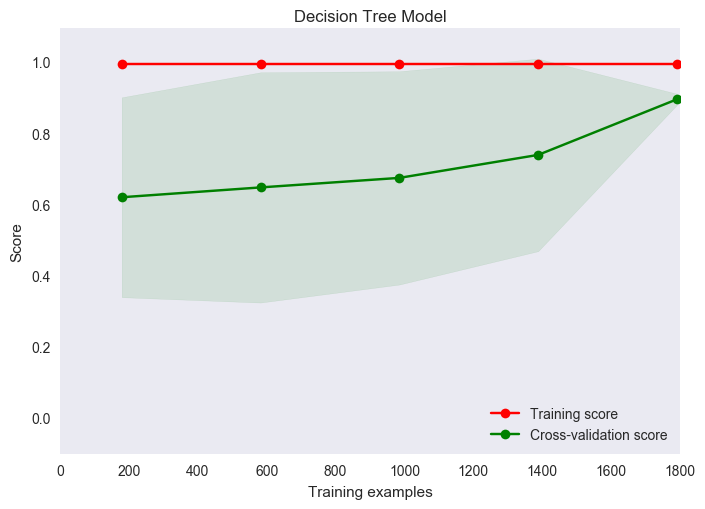

In [26]:
# Learning curve plotting
from sklearn.model_selection import learning_curve
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
train_sizes, train_scores, test_scores = learning_curve(clf, tr_features, tr_labels, n_jobs=-1, cv=kfold,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Decision Tree Model")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
line_up = plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
line_down = plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim(-.1, 1.1)
plt.legend(loc="lower right")
plt.show()

In [20]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
# Method to extract features from speech using librosa


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


# List to store file names
target_files = []

# Method to extract label name and extract features from audio file


def parse_audio_files(path):
    labels = []
    features = np.empty((0, 193))
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[3].split(".")[0])
        target_files.append(fn)
    return np.array(features), np.array(labels)


# Get labels and features of audion file of specified path
ts_features, ts_labels = parse_audio_files('./test_20/*.wav')

# Convert features and labels to the pandas Series data type
ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Trained Model file name
filename = 'clf_Model_protocol_tree.sav'

# Load saved model from file
model = pickle.load(open(filename, 'rb'))

# Predict the emotion class
prediction = model.predict(ts_features)

# True labels
test_true = ts_labels

# List to store prediction
test_predicted = []

# Iterate over model prediction and store it into list
for i, val in enumerate(prediction):
    test_predicted.append(val)


# Accuracy score of model
print('Accuracy Score of Decision Tree model is:', accuracy_score(test_true, test_predicted))

# Number of corrected prediction
print('Number of correct prediction by using Decision Tree is:', accuracy_score(test_true, test_predicted, normalize=False), 'out of', len(ts_labels))

Accuracy Score of Decision Tree model is: 0.914285714286
Number of correct prediction by using Decision Tree is: 512 out of 560


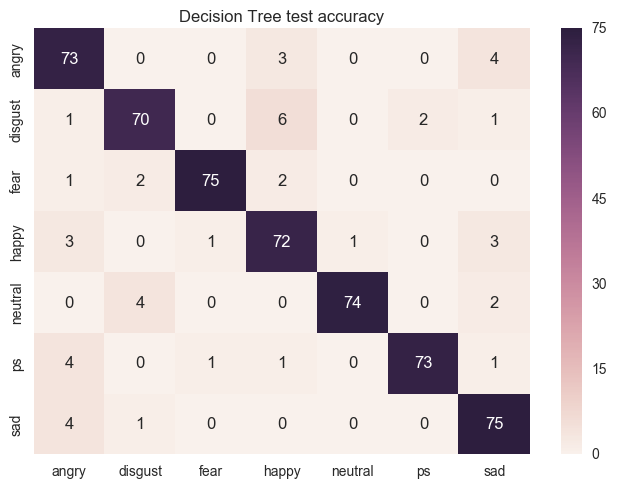

In [22]:
# Plotting confusion matrix
matrix = confusion_matrix(test_true, test_predicted)
classes = list(set(ts_labels))
classes.sort()
df = pd.DataFrame(matrix, columns=classes, index=classes)
plt.figure()
plt.title('Decision Tree test accuracy')
sn.heatmap(df, annot=True)

plt.show()